# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def data_info(data):
    data.info()
    display(data.head())
    display(data.describe())
    print(f'Количество дупликатов в в датасете: \n{data.duplicated().sum()}')
    print(f'Количество пропусков в датасете: \n{data.isnull().sum()}')
    print(f'________________________________________________________')

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 👍 👍 
</div> 

In [4]:
df_list = [df_0, df_1, df_2]
for data in df_list:
    data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Количество дупликатов в в датасете: 
0
Количество пропусков в датасете: 
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Количество дупликатов в в датасете: 
0
Количество пропусков в датасете: 
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Количество дупликатов в в датасете: 
0
Количество пропусков в датасете: 
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
________________________________________________________


**Вывод:** датасеты чистые, пропусков и дупликатов нет. Разброс данных относительно не велик. Но масштабирование необходимо.

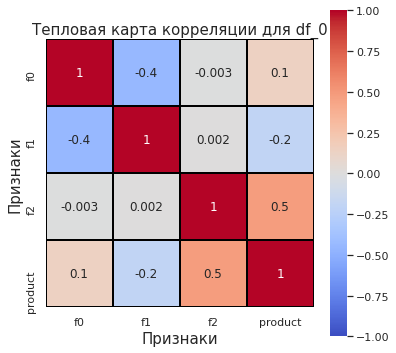

In [5]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.heatmap(df_0.corr(),
            fmt='.1g',
            vmin = -1, 
            vmax = +1, 
            annot = True, 
            cmap = 'coolwarm', 
            square=True, 
            linewidths=1, 
            linecolor='black',
           )

plt.title('Тепловая карта корреляции для df_0', fontsize = 15)
plt.xlabel('Признаки', fontsize = 15)
plt.ylabel('Признаки', fontsize = 15)
plt.show()

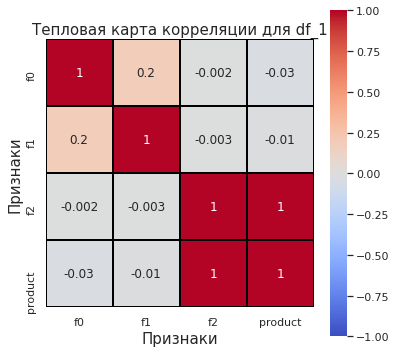

In [6]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.heatmap(df_1.corr(),
            fmt='.1g',
            vmin = -1, 
            vmax = +1, 
            annot = True, 
            cmap = 'coolwarm', 
            square=True, 
            linewidths=1, 
            linecolor='black',
           )

plt.title('Тепловая карта корреляции для df_1', fontsize = 15)
plt.xlabel('Признаки', fontsize = 15)
plt.ylabel('Признаки', fontsize = 15)
plt.show()

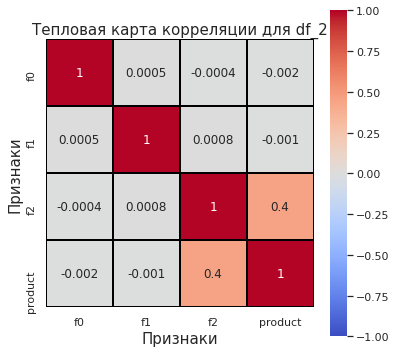

In [7]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.heatmap(df_2.corr(),
            fmt='.1g',
            vmin = -1, 
            vmax = +1, 
            annot = True, 
            cmap = 'coolwarm', 
            square=True, 
            linewidths=1, 
            linecolor='black',
           )

plt.title('Тепловая карта корреляции для df_2', fontsize = 15)
plt.xlabel('Признаки', fontsize = 15)
plt.ylabel('Признаки', fontsize = 15)
plt.show()

**Вывод:** в датасетах `'df_0'` и `'df_2'` уровень корреляции признаков допустимый. Исключением стал признак `'f2'` для `'df_1'` с корреляцией равной 1. Это полная линейная зависимость или `мультиколлинеарность.`

## Обучение и проверка модели

In [8]:
pd.options.mode.chained_assignment = None

In [9]:
#создаем функцию для выделения признаков и целевого признака
def get_featureas_and_targets(data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product'] 
    return features, target

In [10]:
#получаем признаки
features0, target0 = get_featureas_and_targets(df_0)
features1, target1 = get_featureas_and_targets(df_1)
features2, target2 = get_featureas_and_targets(df_2)

In [11]:
#разбиваем датасеты на тренировочные и валидационные выборки в соотношении 75:25
def split_train_data(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, 
                                                                      random_state = 12345)
    return features_train, features_valid, target_train, target_valid   

In [12]:
#получаем признаки из выборок
features0_train, features0_valid, target0_train, target0_valid = split_train_data(features0, target0)
features1_train, features1_valid, target1_train, target1_valid = split_train_data(features1, target1)
features2_train, features2_valid, target2_train, target2_valid = split_train_data(features2, target2)

In [13]:
#создаем функцию для масштабирование признаков
numeric = ['f0', 'f1', 'f2']
def to_scale(features_train, features_valid):
    scaler = StandardScaler()
    features_train[numeric] = scaler.fit_transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    return features_train, features_valid

In [14]:
#масштабируем признаки
features0_train, features0_valid = to_scale(features0_train, features0_valid)
features1_train, features1_valid = to_scale(features1_train, features1_valid)
features2_train, features2_valid = to_scale(features2_train, features2_valid)

In [15]:
#создаем функцию для обучения модели и метрик
def learn_model(features_train, features_valid, target_train, target_valid):  
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)
    print(f'Средний запас сырья: {sum(predict) / len(predict)}')
    print(f'RMSE: {mean_squared_error(target_valid, predict)**0.5}')
    print(f'R2: {r2_score(target_valid, predict)}')

In [16]:
#создаем сохранения предсказаний модели
def get_prediction(features_train, features_valid, target_train, target_valid):  
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)
    prediction = pd.Series(predict)
    return prediction

In [18]:
#применяем модели
print('Первая локация:')
learn_model(features0_train, features0_valid, target0_train, target0_valid)

Первая локация:
Средний запас сырья: 92.59256778438008
RMSE: 37.5794217150813
R2: 0.27994321524487786


In [19]:
print('Вторая локация:')
learn_model(features1_train, features1_valid, target1_train, target1_valid)

Вторая локация:
Средний запас сырья: 68.7285468954458
RMSE: 0.893099286775617
R2: 0.9996233978805127


In [20]:
print('Третья локация:')
learn_model(features2_train, features2_valid, target2_train, target2_valid)

Третья локация:
Средний запас сырья: 94.96504596800506
RMSE: 40.02970873393434
R2: 0.20524758386040443


**Вывод:** 
* RMSE на первой и третьей локациях большой. Разброс между реальными данными и средним показателем высокий. Скорее всего, это результат среденей корреляции признаков.
* RMSE второй локации ниже 1. Хороший результат. Однако это следствие мультиколлинеарности, когда от одного признака полностью зависит резульат. 
* R2 на первой и третьей локациях очень низкий. 
* R2 второй локации  = 1.

## Подготовка к расчёту прибыли

In [21]:
#сохраняем предсказания в Series
prediction0 = get_prediction(features0_train, features0_valid, target0_train, target0_valid)
prediction1 = get_prediction(features1_train, features1_valid, target1_train, target1_valid)
prediction2 = get_prediction(features2_train, features2_valid, target2_train, target2_valid)

In [22]:
#преобразуем таргеты так, чтобы не было конфликта с индексами
target0_valid = target0_valid.reset_index(drop=True)
target1_valid = target1_valid.reset_index(drop=True)
target2_valid = target2_valid.reset_index(drop=True)

In [24]:
BUDGET = 10e9
PROFIT = 450000
COUNT = 200

In [25]:
POINT_OF_BREAKEVVEN = BUDGET / PROFIT
print('Точка безубыточности скважины составляет: {:.2f} баррелей'.format(POINT_OF_BREAKEVVEN, 2))

Точка безубыточности скважины составляет: 22222.22 баррелей


In [31]:
POINT_OF_BREAKEVVEN/200

111.11111111111111

In [26]:
def revenue(target, prediction, count):
    pred_sorted = prediction.sort_values(ascending=False)
    top_200 = target.loc[pred_sorted.index][:COUNT]
    result = PROFIT * top_200.sum() - BUDGET
    return result

**Вывод:** расчеты показали, что для безубыточности разаработки, в скважине должно быть около около 22222 баррелей. 

## Расчёт прибыли и рисков 

In [27]:
state = np.random.RandomState(12345)

def calculation_revenue(target, prediction):
    values = []
    for i in range(1000):
        target_subsample = target.sample(500, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, COUNT))

    values = pd.Series(values)
    mean = values.mean()
    print(f'Средняя прибыль {mean}.руб.')
    
    lower = np.quantile(values, 0.025)
    upper = np.quantile(values, 0.975)
    print(f'95%-й доверительный интервал {lower} - {upper}.руб.')
    
    risk = st.percentileofscore(values, 0)
    print(f'Риск убытков {risk} %')
    return 

In [28]:
calculation_revenue(target0_valid, prediction0)

Средняя прибыль 425938526.91059244.руб.
95%-й доверительный интервал -102090094.83793654 - 947976353.3583689.руб.
Риск убытков 6.0 %


In [29]:
calculation_revenue(target1_valid, prediction1)

Средняя прибыль 518259493.6973249.руб.
95%-й доверительный интервал 128123231.43308444 - 953612982.0669085.руб.
Риск убытков 0.30000000000000004 %


In [30]:
calculation_revenue(target2_valid, prediction2)

Средняя прибыль 420194005.3440501.руб.
95%-й доверительный интервал -115852609.16001143 - 989629939.8445739.руб.
Риск убытков 6.2 %


**Вывод:** Очевидным регионом для разработки является регион №2. И вот почему:
* Риск убыток составляет `3%`, в то время как в дургих риск составляет от `6%` до `6.2%`.
* Средняя прибыль разработки самая максимальная по сравнению с другими.
* Доверительный интервал для второго региона не включает в себя отрицательных чисел. 

## Заключение:

На вход мы получили чистые данные: дупликатов и пропусков нет. Для обучения модели мы применили техники масштабирования признаков. Для оценки качества модели мы использовали метрики RMSE и R2. Они показали, что модели для 1 и 3 регионов получились очень низкокачественными. Модель для 2 регона получилась качественной, т.к. один из признаков имел полную зависимость с целевым признаком. После применения обученной модели и использования техники Bootstrap удалось получить результат.